# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | seoul
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | jasper
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | flinders
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | minudasht
Processing Record 22 of Set 1 | saleaula
City n

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,287.38,58,100,7.20,AU,1685062392
1,kodiak,57.7900,-152.4072,281.88,71,100,3.60,US,1685062392
2,bluff,-46.6000,168.3333,286.08,86,100,9.22,NZ,1685062392
3,atuona,-9.8000,-139.0333,300.57,78,7,7.90,PF,1685062392
4,caravelas,-17.7125,-39.2481,295.28,91,7,3.37,BR,1685062393


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,287.38,58,100,7.20,AU,1685062392
1,kodiak,57.7900,-152.4072,281.88,71,100,3.60,US,1685062392
2,bluff,-46.6000,168.3333,286.08,86,100,9.22,NZ,1685062392
3,atuona,-9.8000,-139.0333,300.57,78,7,7.90,PF,1685062392
4,caravelas,-17.7125,-39.2481,295.28,91,7,3.37,BR,1685062393


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

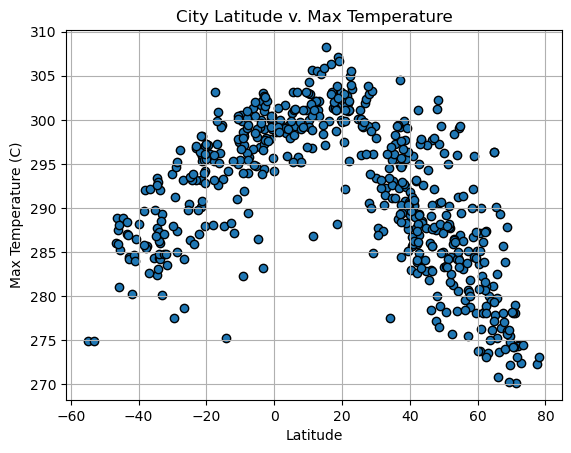

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude v. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

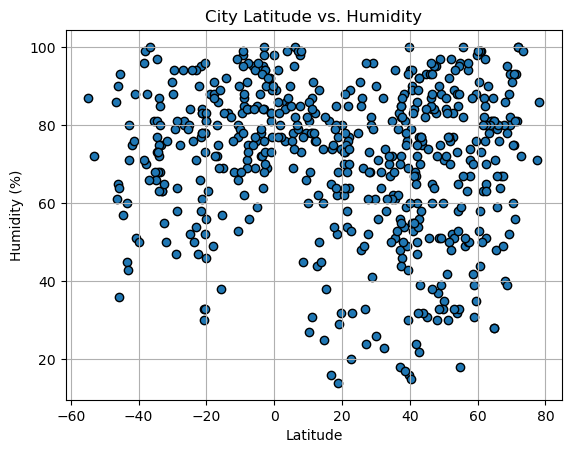

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

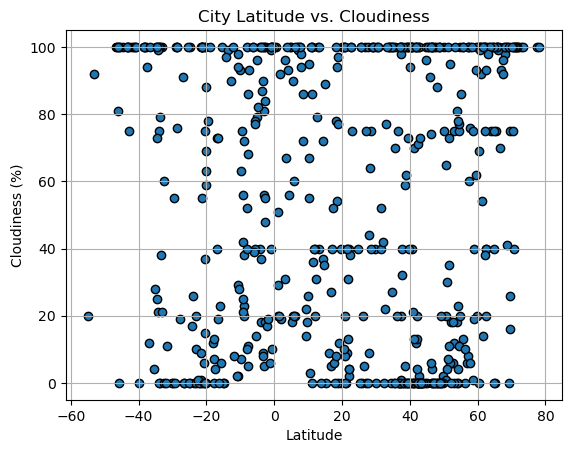

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

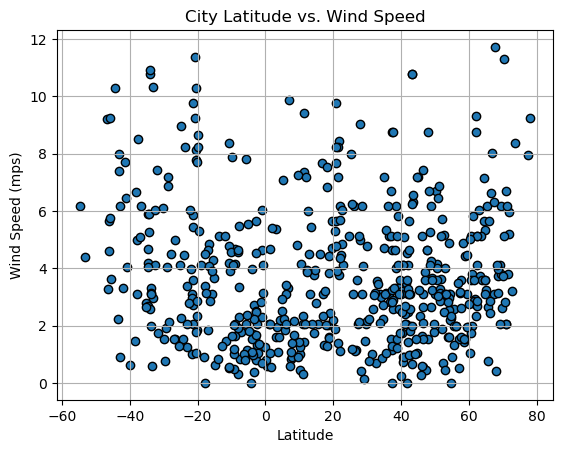

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression_plot(data,x_column,y_column):
    x = data[x_column]
    y = data[y_column]

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,281.88,71,100,3.60,US,1685062392
6,seoul,37.5683,126.9778,294.91,46,0,2.57,KR,1685062206
8,yellowknife,62.4560,-114.3525,287.44,51,40,4.12,CA,1685062338
9,jasper,37.2001,-94.3502,299.18,48,100,1.54,US,1685062394
12,lasa,46.6166,10.7002,285.64,84,4,0.56,IT,1685062395


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,287.38,58,100,7.20,AU,1685062392
2,bluff,-46.6000,168.3333,286.08,86,100,9.22,NZ,1685062392
3,atuona,-9.8000,-139.0333,300.57,78,7,7.90,PF,1685062392
4,caravelas,-17.7125,-39.2481,295.28,91,7,3.37,BR,1685062393
5,constitucion,-35.3333,-72.4167,284.35,81,4,2.80,CL,1685062256


###  Temperature vs. Latitude Linear Regression Plot

In [23]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

In [ ]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


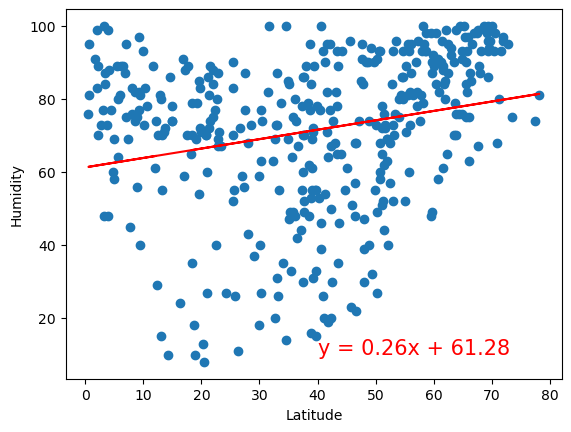

In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.0002808747046324607


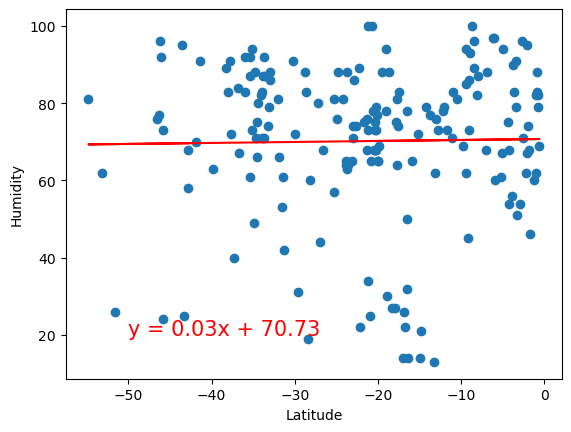

In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


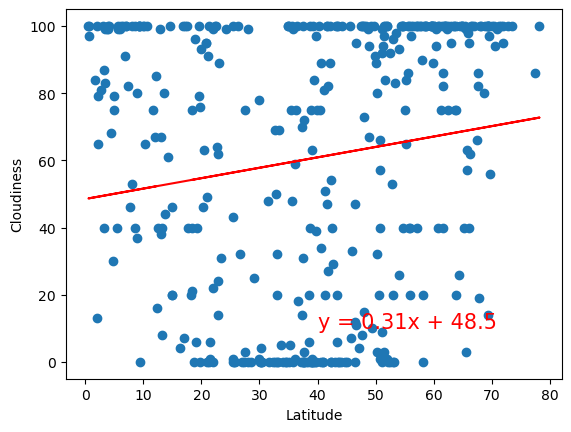

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.02056735429994368


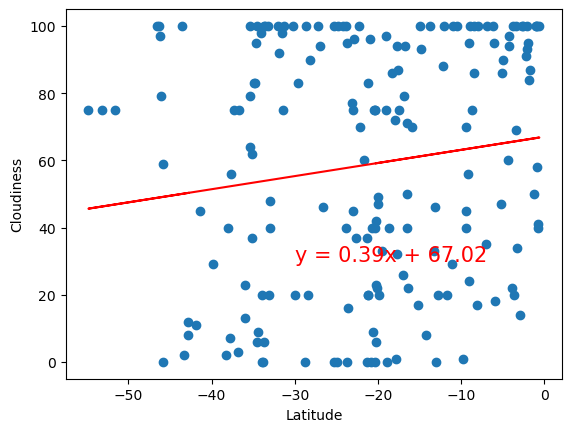

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


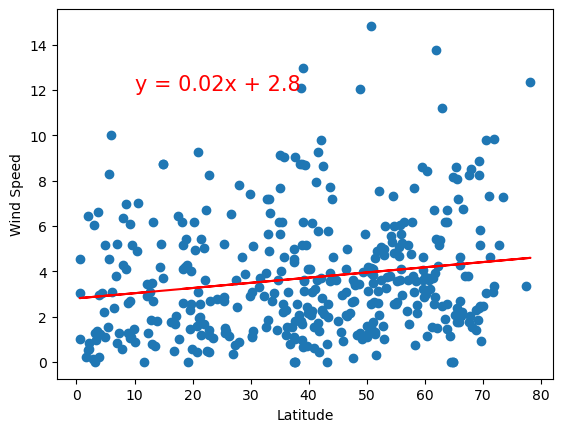

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: 0.062239040700515696


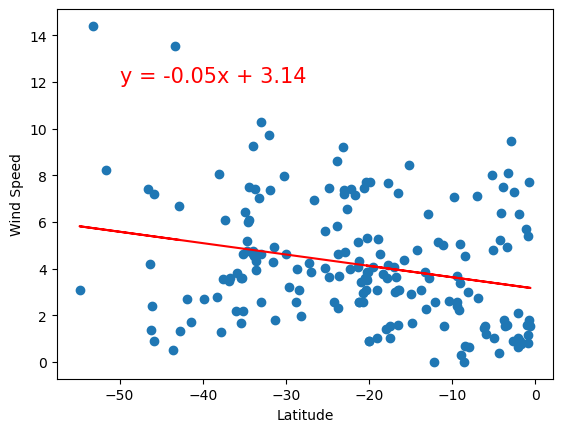

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE